In [2]:
import pandas as pd
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_json("NBA_player_data.json")

In [4]:
position_map = {"PG":1,"SG":2,"SF":3,"PF":4,"C":5}
features = data.columns.drop(["_id","Rk","Player","Pos","Tm"])

X=data[features]
y=data["Pos"].map(position_map)

In [5]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [7]:
from sklearn.metrics import accuracy_score, mean_squared_error
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

MSE:  0.8922113278327245


In [8]:
coef = lasso.coef_
non_zero_indexes = []
for i in range(len(coef)):
    if coef[i] != 0:
        non_zero_indexes.append(i)

for i in non_zero_indexes:
    print(features[i],": ",coef[i])


FG% :  0.17283942147189937
2P% :  0.1972684924462618
ORB :  0.2651981720830351
TRB :  0.34981173644176106
AST :  -0.41729722198722113
STL :  -0.2445696582019553
BLK :  0.08028453383610243


In [9]:
#Number of non-zero predictors based on alpha value
start_alpha = 0.001
end_alpha = 1.0
num_alphas = 100
alpha_values = np.linspace(start_alpha, end_alpha, num_alphas)

non_zero_predictors = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    non_zero_coefficients = np.sum(lasso.coef_ != 0)
    non_zero_predictors.append(non_zero_coefficients)

print(non_zero_predictors)

[24, 17, 15, 13, 12, 10, 10, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


c:\Users\14156\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+00, tolerance: 6.884e-02
  model = cd_fast.enet_coordinate_descent(


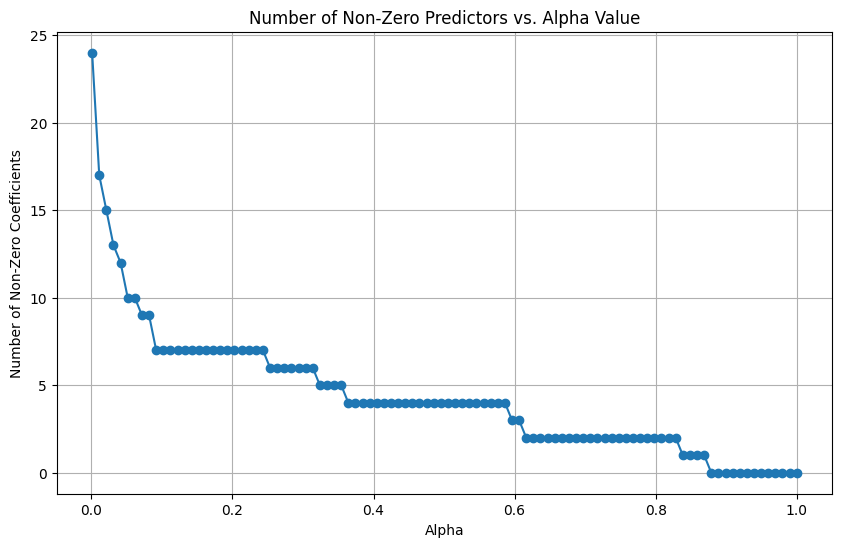

In [10]:
#plots the cell above
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, non_zero_predictors, marker='o', linestyle='-')
plt.title('Number of Non-Zero Predictors vs. Alpha Value')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-Zero Coefficients')
plt.grid(True)
plt.show()

In [11]:
#Shows MSE based on different values for alpha
from sklearn.metrics import mean_squared_error
mse_values = []
min_alpha = 10
min_mse = 10
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha,max_iter=10000)
    
    lasso.fit(X_train_scaled, y_train)
    
    y_pred = lasso.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    
    mse_values.append(mse)
    if mse<min_mse:
        min_mse=mse
        min_alpha = alpha


for alpha, mse in zip(alpha_values, mse_values):
    print(f"Alpha: {alpha:.3f}, MSE: {mse:.4f}")

print("Minimum MSE: ",min_mse)
print("Best alpha: ", min_alpha)

Alpha: 0.001, MSE: 0.8629
Alpha: 0.011, MSE: 0.8479
Alpha: 0.021, MSE: 0.8413
Alpha: 0.031, MSE: 0.8410
Alpha: 0.041, MSE: 0.8429
Alpha: 0.051, MSE: 0.8490
Alpha: 0.062, MSE: 0.8575
Alpha: 0.072, MSE: 0.8668
Alpha: 0.082, MSE: 0.8777
Alpha: 0.092, MSE: 0.8876
Alpha: 0.102, MSE: 0.8934
Alpha: 0.112, MSE: 0.9000
Alpha: 0.122, MSE: 0.9075
Alpha: 0.132, MSE: 0.9158
Alpha: 0.142, MSE: 0.9249
Alpha: 0.152, MSE: 0.9348
Alpha: 0.162, MSE: 0.9456
Alpha: 0.173, MSE: 0.9573
Alpha: 0.183, MSE: 0.9697
Alpha: 0.193, MSE: 0.9830
Alpha: 0.203, MSE: 0.9972
Alpha: 0.213, MSE: 1.0121
Alpha: 0.223, MSE: 1.0279
Alpha: 0.233, MSE: 1.0445
Alpha: 0.243, MSE: 1.0620
Alpha: 0.253, MSE: 1.0775
Alpha: 0.263, MSE: 1.0878
Alpha: 0.273, MSE: 1.0987
Alpha: 0.284, MSE: 1.1102
Alpha: 0.294, MSE: 1.1223
Alpha: 0.304, MSE: 1.1350
Alpha: 0.314, MSE: 1.1483
Alpha: 0.324, MSE: 1.1618
Alpha: 0.334, MSE: 1.1741
Alpha: 0.344, MSE: 1.1870
Alpha: 0.354, MSE: 1.2005
Alpha: 0.364, MSE: 1.2116
Alpha: 0.374, MSE: 1.2216
Alpha: 0.384

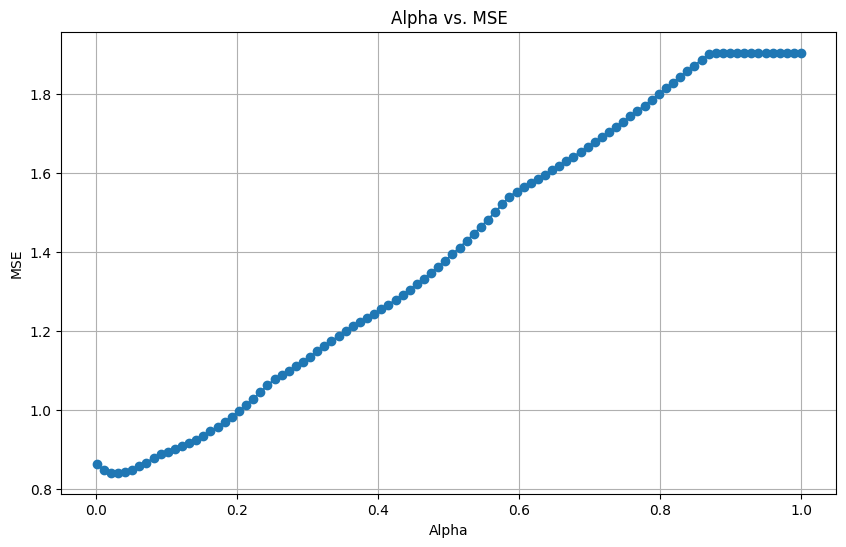

In [12]:
#plots the cell above
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values, marker='o', linestyle='-')
plt.title('Alpha vs. MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

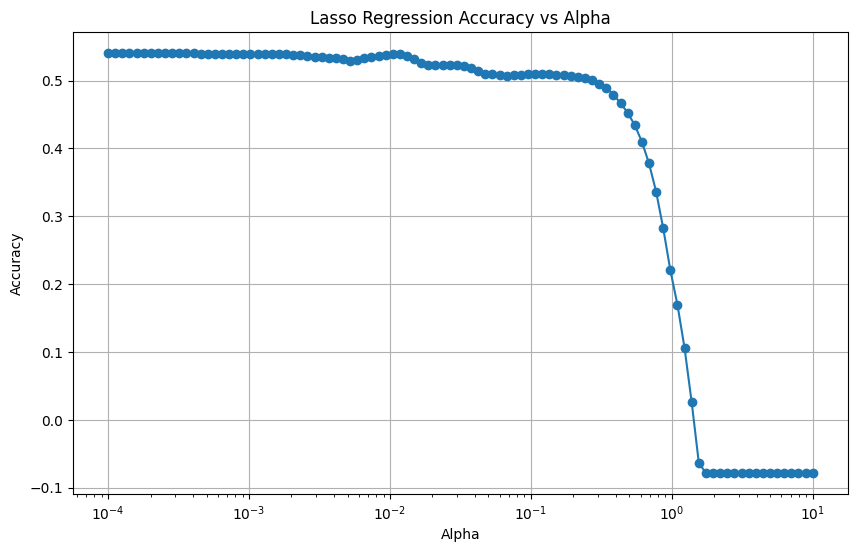

[0.5403683098967447, 0.5403601644890321, 0.5403491976345409, 0.5403455707535285, 0.540345388097945, 0.5403426608841223, 0.5403363950815352, 0.5403253124124127, 0.5403004709618333, 0.5402285096299244, 0.5401428659603114, 0.5400405913262085, 0.5399180398775751, 0.5397833069521449, 0.5396438368158596, 0.539458858526475, 0.5392919633051885, 0.5392911776170396, 0.5392722352477498, 0.5392281602858491, 0.5391499123475207, 0.5390257673897597, 0.5388406002825868, 0.5387187260016577, 0.5387642352959319, 0.5387645966560768, 0.5382132624100504, 0.5371859867523192, 0.535939942858266, 0.5348604589343978, 0.534445954662764, 0.5337795198656614, 0.5324565239873047, 0.5310306046466405, 0.5290533357057529, 0.5309254325360284, 0.5334000154377936, 0.5352304409132271, 0.5357664417402959, 0.5380607651164908, 0.5393741087491798, 0.5390575072925505, 0.5363736180882333, 0.531085989094143, 0.5253264144507741, 0.5235907372940138, 0.5233688942672166, 0.5234998393467298, 0.5233844081875871, 0.5229898748762186, 0.52

In [15]:
#plots accuracy for different alpha values
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
alpha_values = np.logspace(-4, 1, 100)

accuracy_scores = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, random_state=42,max_iter=100000)
    lasso.fit(X_train, y_train)
    
    
    accuracy_scores.append(lasso.score(X_test,y_test))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Lasso Regression Accuracy vs Alpha')
plt.grid(True)
plt.show()
print(accuracy_scores)